In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

In [0]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar

In [0]:
!tar -xvf '/content/VOCtrainval_11-May-2012.tar'
!mv '/content/VOCdevkit' '/content/VOC2012'

In [0]:
!tar -xvf 'VOCtest_06-Nov-2007.tar'
!mv '/content/VOCdevkit' '/content/VOC2007test'

In [0]:
!tar -xvf 'VOCtrainval_06-Nov-2007.tar'
!mv '/content/VOCdevkit' '/content/VOC2007'

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import glob

In [0]:
_, axes = plt.subplots(1,3, figsize = (15,10))
img1 = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2011_003114.jpg')
img2 = cv2.imread('/content/VOCdevkit/VOC2012/SegmentationObject/2011_003114.png')
img3 = cv2.imread('/content/VOCdevkit/VOC2012/SegmentationClass/2011_003114.png')
imgs = [img1, img2, img3]
titles = ['Origin', 'Segmentation Object', 'Segmentation Class'] # segmentation ~ vùng phân chia
for index, ax in enumerate(axes):
  ax.imshow(imgs[index], cmap = plt.get_cmap('gray'))
  ax.set_title(titles[index])
  ax.axis('off')
  print(imgs[index].shape)

In [0]:
!cp '/content/VOC2007/VOC2007/ImageSets/Main/person_trainval.txt' '/content/person_trainval_2007.txt'
!cp '/content/VOC2007test/VOC2007/ImageSets/Main/person_test.txt' '/content/person_trainval_2007test.txt'
!cp '/content/VOC2012/VOC2012/ImageSets/Main/person_trainval.txt' '/content/person_trainval_2012.txt'

In [0]:
df = pd.read_csv('/content/person_trainval_2007.txt', sep = '\s+', dtype = str)
df.columns = ['file_name', 'type']
print(df.head())
print(df.shape)
df['type'] = df.type.map(lambda x: int(x))
df = df[df.type == 1]
print(df.head())
print(df.shape)
df = df.drop('type', 1)

  file_name type
0    000007   -1
1    000009    1
2    000012   -1
3    000016   -1
4    000017    1
(5010, 2)
   file_name  type
1     000009     1
4     000017     1
7     000021     1
8     000023     1
11    000030     1
(2008, 2)


In [0]:
df.to_csv('/content/person_trainval_2007_1.csv', index = False, header = None, sep = ' ')

In [0]:
ls /content/drive/'My Drive'

 16521838_HuynhVanTu_BaiTap1.pdf      'http:  codepad.org 75NB6gsq'/
 16521838_HuynhVanTu_IT002-H212.1.7z   Images/
'Bảng phân phối XSTK'/                 img_resize/
'Cách học Tiếng Anh thần kỳ.pdf'       labels.csv
 Cpp/                                  Nhom_11.zip
'Dataset Upper body HDF5'/            'Ôn tập.pdf'
 DeepFashion/                         'Shirt Crawler'/
 DetMatrix.cpp.txt                     subtitle/
 du_cang/                              tagt.mp3
 electronics-07-00301.pdf             'tai lieu xstk (1).rar'
 Familiar_Images/                     'Thi cuoi ky.7z'
'Fashion Detection'/                  'Third Year'/
 Financial_Predictor/                  ThucHanhMachSo.7z
 HDH/


In [0]:
!cp -R "/content/drive/My Drive/DeepFashion/Fashion Landmark Detection Benchmark" "/content/Fashion Detection"

In [0]:
import zipfile

In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/DeepFashion/Consumer-to-shop Clothes Retrieval Benchmark/Img/img.zip", "r")
zip_ref.extractall("/content/Fashion Detection")
zip_ref.close()

In [0]:
#!ls -l "/content/Fashion Detection/img"
# 2670968 images

In [0]:
df1 = pd.read_csv("/content/Fashion Detection/Anno/list_bbox.txt", header = 2, sep = ' ')
df1.columns = ['image_name', 'xmin', 'ymin', 'xmax', 'ymax']
print(df1.head(10))
print(df1.tail())
print(df1.shape)


In [0]:
landmarks = open('/content/Fashion Detection/Anno/list_landmarks.txt', 'r')
text = landmarks.readlines()
print(len(text))
file_write = open('/content/Fashion Detection/Anno/list_landmarks_shift.txt', 'w')
for r in text:
  slice_str = r[:23]
  file_write.writelines(slice_str + '\n')

123018


In [0]:
df2 = pd.read_csv('/content/Fashion Detection/Anno/list_landmarks_shift.txt', header = 2, sep = '\s+')
df2.columns = ['image_name','class_id']
print(df2.head())
print(df2.tail())
print(df2.shape)

In [0]:
df2.info()

In [0]:
df1['class_id'] = df2.class_id
print(df1.head())
print(df1.tail())

In [0]:
df1['image_name'] = df1.image_name.map(lambda x: x[4:])

In [0]:
print(df1.head())

In [0]:
img_names = df1.image_name
df1.set_index('image_name', inplace = True)
for name in img_names:
  root = '/content/Fashion Detection/img/'
  img = cv2.imread(root + name)
  #img_resize = cv2.resize(img, (480, 300))
  #cv2.imwrite('/content/Fashion Detection/img_resize/'+name, img_resize)
  scale = np.array([300,480])/np.array(img.shape[:2])
  df1.loc[name, ['xmin', 'xmax']]*=scale[1]
  df1.loc[name, ['ymin', 'ymax']]*=scale[0]
  
  

In [0]:
df1.iloc[:, 0:4] = df1.iloc[:, 0:4].astype(int)

In [0]:
df1.set_index('image_name', inplace = True)

In [0]:
print(df1.tail())

In [0]:
df1.to_csv('/content/labels.csv')

In [0]:
df1 = pd.read_csv('/content/drive/My Drive/labels.csv')

In [0]:
type1 = df1[df1.class_id == 1]
type2 = df1[df1.class_id == 2]
type3 = df1[df1.class_id == 3]
len1, len2, len3 = type1.shape[0], type2.shape[0], type3.shape[0]
split1, split2, split3 = int(len1*0.2), int(len2*0.2), int(len3*0.2)
print(len1, len2, len3, split1, split2, split3)

42030 30972 50013 8406 6194 10002


In [0]:
img = cv2.imread("/content/Fashion Detection/img_resize/img_00005306.jpg") # type upper-body
img2 = cv2.imread("/content/Fashion Detection/img_resize/img_00005305.jpg") # type lower-body
img3 = cv2.imread("/content/Fashion Detection/img_resize/img_00005325.jpg") # type full-body
imgs = [img, img2, img3]
fig, axes = plt.subplots(1,3, figsize = (15,10))
#bbs = [(145, 118, 344, 467), (121, 69, 512, 467), (77, 77, 234, 452)]
bbs = [(135, 69, 322, 273), (113, 40, 480, 273), (120, 51, 364, 300)]
titles = ['upper body', 'lower body', 'full body']
for i, ax in enumerate(axes):
  cv2.rectangle(imgs[i], (bbs[i][0], bbs[i][1]), (bbs[i][2], bbs[i][3]), (255,0,0), 3)
  ax.imshow(imgs[i], cmap=plt.get_cmap('gray'))
  ax.set_title(titles[i])
  ax.axis('off')
  print(imgs[i].shape)
#axes[.imshow(img, cmap=plt.get_cmap('gray'))

In [0]:
#train = pd.concat([type1[split1:], type2[split2:], type3[split3:]])
#val = pd.concat([type1[:split2], type2[:split2], type3[:split3]])
train = type1[split1:]
val = type1[:split1]
print(train.head())
print(val.head())
print(train.shape)
print(val.shape)

In [0]:
train.to_csv('/content/Fashion Detection/labels_train.csv', index = False)
val.to_csv('/content/Fashion Detection/labels_val.csv', index = False)

In [0]:
cd '/content/drive/My Drive/ssd_keras'

/content/drive/My Drive/ssd_keras


In [0]:
ls

bounding_box_utils/   models/
CONTRIBUTING.md       README.md
data_generator/       ssd300_evaluation_COCO.ipynb
eval_utils/           ssd300_evaluation.ipynb
examples/             ssd300_inference.ipynb
__init__.py           ssd300_training.ipynb
ISSUE_TEMPLATE.md     ssd512_inference.ipynb
keras_layers/         ssd7_training.ipynb
keras_loss_function/  ssd_encoder_decoder/
LICENSE.txt           training_summaries/
misc_utils/           weight_sampling_tutorial.ipynb


In [0]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN, CSVLogger
from keras import backend as K
from keras.models import load_model
from math import ceil
import numpy as np
from matplotlib import pyplot as plt

from models.keras_ssd7 import build_model
from keras_loss_function.keras_ssd_loss import SSDLoss
from keras_layers.keras_layer_AnchorBoxes import AnchorBoxes
from keras_layers.keras_layer_DecodeDetections import DecodeDetections
from keras_layers.keras_layer_DecodeDetectionsFast import DecodeDetectionsFast

from ssd_encoder_decoder.ssd_input_encoder import SSDInputEncoder
from ssd_encoder_decoder.ssd_output_decoder import decode_detections, decode_detections_fast

from data_generator.object_detection_2d_data_generator import DataGenerator
from data_generator.object_detection_2d_misc_utils import apply_inverse_transforms
from data_generator.data_augmentation_chain_variable_input_size import DataAugmentationVariableInputSize
from data_generator.data_augmentation_chain_constant_input_size import DataAugmentationConstantInputSize
from data_generator.data_augmentation_chain_original_ssd import SSDDataAugmentation

Using TensorFlow backend.


In [0]:
img_height = 300 # Height of the input images
img_width = 480 # Width of the input images
img_channels = 3 # Number of color channels of the input images
intensity_mean = 127.5 # Set this to your preference (maybe `None`). The current settings transform the input pixel values to the interval `[-1,1]`.
intensity_range = 127.5 # Set this to your preference (maybe `None`). The current settings transform the input pixel values to the interval `[-1,1]`.
n_classes = 5 # Number of positive classes
scales = [0.08, 0.16, 0.32, 0.64, 0.96] # An explicit list of anchor box scaling factors. If this is passed, it will override `min_scale` and `max_scale`.
aspect_ratios = [0.5, 1.0, 2.0] # The list of aspect ratios for the anchor boxes
two_boxes_for_ar1 = True # Whether or not you want to generate two anchor boxes for aspect ratio 1
steps = None # In case you'd like to set the step sizes for the anchor box grids manually; not recommended
offsets = None # In case you'd like to set the offsets for the anchor box grids manually; not recommended
clip_boxes = False # Whether or not to clip the anchor boxes to lie entirely within the image boundaries
variances = [1.0, 1.0, 1.0, 1.0] # The list of variances by which the encoded target coordinates are scaled
normalize_coords = True # Whether or not the model is supposed to use coordinates relative to the image size

In [0]:
# 1: Build the Keras model

K.clear_session() # Clear previous models from memory.

model = build_model(image_size=(img_height, img_width, img_channels),
                    n_classes=n_classes,
                    mode='training',
                    l2_regularization=0.0005,
                    scales=scales,
                    aspect_ratios_global=aspect_ratios,
                    aspect_ratios_per_layer=None,
                    two_boxes_for_ar1=two_boxes_for_ar1,
                    steps=steps,
                    offsets=offsets,
                    clip_boxes=clip_boxes,
                    variances=variances,
                    normalize_coords=normalize_coords,
                    subtract_mean=intensity_mean,
                    divide_by_stddev=intensity_range)


In [0]:
# 2: Optional: Load some weights

weights_path = '/content/drive/My Drive/VGG_ILSVRC_16_layers_fc_reduced.h5'

model.load_weights(weights_path, by_name=True)

In [0]:
# 3: Instantiate an Adam optimizer and the SSD loss function and compile the model

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

ssd_loss = SSDLoss(neg_pos_ratio=3, alpha=1.0)

model.compile(optimizer=adam, loss=ssd_loss.compute_loss)

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 480, 3)  0                                            
__________________________________________________________________________________________________
identity_layer (Lambda)         (None, 300, 480, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
input_mean_normalization (Lambd (None, 300, 480, 3)  0           identity_layer[0][0]             
__________________________________________________________________________________________________
input_stddev_normalization (Lam (None, 300, 480, 3)  0           input_mean_normalization[0][0]   
__________________________________________________________________________________________________
conv1 (Con

In [0]:
# person
train_dataset = DataGenerator(load_images_into_memory=False, hdf5_dataset_path='/content/drive/My Drive/Dataset Person HDF5/dataset_pascal_voc_07+12_trainval(person).h5')
val_dataset = DataGenerator(load_images_into_memory=False, hdf5_dataset_path='/content/drive/My Drive/Dataset Person HDF5/dataset_pascal_voc_07_test(person).h5')

Loading evaluation-neutrality annotations: 100%|██████████| 1200/1200 [00:00<00:00, 8588.84it/s]


In [0]:
# upper
train_dataset = DataGenerator(load_images_into_memory=False, hdf5_dataset_path='/content/drive/My Drive/Dataset Upper body HDF5/dataset_deep_fashion_train.h5')
val_dataset = DataGenerator(load_images_into_memory=False, hdf5_dataset_path='/content/drive/My Drive/Dataset Upper body HDF5/dataset_deep_fashion_val.h5')

Loading image IDs: 100%|██████████| 8406/8406 [00:00<00:00, 11007.78it/s]


In [0]:
train_dataset_size = train_dataset.get_dataset_size()
val_dataset_size   = val_dataset.get_dataset_size()

print("Number of images in the training dataset:\t{:>6}".format(train_dataset_size))
print("Number of images in the validation dataset:\t{:>6}".format(val_dataset_size))

Number of images in the training dataset:	 33624
Number of images in the validation dataset:	  8406


In [0]:
# 1: Instantiate two `DataGenerator` objects: One for training, one for validation.

# Optional: If you have enough memory, consider loading the images into memory for the reasons explained above.

train_dataset = DataGenerator(load_images_into_memory=False, hdf5_dataset_path=None)
val_dataset = DataGenerator(load_images_into_memory=False, hdf5_dataset_path=None)

# 2: Parse the image and label lists for the training and validation datasets. This can take a while.

# TODO: Set the paths to the datasets here.

# The directories that contain the images.
VOC_2007_images_dir      = '/content/VOC2007/VOC2007/JPEGImages'
VOC_2012_images_dir      = '/content/VOC2012/VOC2012/JPEGImages'
VOC_2007_test_images_dir = '/content/VOC2007test/VOC2007/JPEGImages'

# The directories that contain the annotations.
VOC_2007_annotations_dir      = '/content/VOC2007/VOC2007/Annotations'
VOC_2012_annotations_dir      = '/content/VOC2012/VOC2012/Annotations'
VOC_2007_test_annotations_dir = '/content/VOC2007test/VOC2007/Annotations'

# The paths to the image sets.
VOC_2007_train_image_set_filename    = '/content/VOC2007/VOC2007/ImageSets/Main/train.txt'
VOC_2012_train_image_set_filename    = '/content/VOC2012/VOC2012/ImageSets/Main/train.txt'
VOC_2007_val_image_set_filename      = '/content/VOC2007/VOC2007/ImageSets/Main/val.txt'
VOC_2012_val_image_set_filename      = '/content/VOC2012/VOC2012/ImageSets/Main/val.txt'
VOC_2007_trainval_image_set_filename = '/content/person_trainval_2007.txt'
VOC_2012_trainval_image_set_filename = '/content/person_trainval_2012.txt'
VOC_2007_test_image_set_filename     = '/content/person_trainval_2007test - Copy.txt'

# The XML parser needs to now what object class names to look for and in which order to map them to integers.
classes = ['background', 'person']

train_dataset.parse_xml(images_dirs=[VOC_2007_images_dir,
                                     VOC_2012_images_dir],
                        image_set_filenames=[VOC_2007_trainval_image_set_filename,
                                             VOC_2012_trainval_image_set_filename],
                        annotations_dirs=[VOC_2007_annotations_dir,
                                          VOC_2012_annotations_dir],
                        classes=classes,
                        include_classes='all',
                        exclude_truncated=False,
                        exclude_difficult=False,
                        ret=False)

val_dataset.parse_xml(images_dirs=[VOC_2007_test_images_dir],
                      image_set_filenames=[VOC_2007_test_image_set_filename],
                      annotations_dirs=[VOC_2007_test_annotations_dir],
                      classes=classes,
                      include_classes='all',
                      exclude_truncated=False,
                      exclude_difficult=True,
                      ret=False)

# Optional: Convert the dataset into an HDF5 dataset. This will require more disk space, but will
# speed up the training. Doing this is not relevant in case you activated the `load_images_into_memory`
# option in the constructor, because in that cas the images are in memory already anyway. If you don't
# want to create HDF5 datasets, comment out the subsequent two function calls.

train_dataset.create_hdf5_dataset(file_path='dataset_pascal_voc_07+12_trainval.h5',
                                  resize=[img_height, img_width],
                                  variable_image_size=True,
                                  verbose=True)

val_dataset.create_hdf5_dataset(file_path='dataset_pascal_voc_07_test.h5',
                                resize=[img_height, img_width],
                                variable_image_size=True,
                                verbose=True)

train_dataset_size = train_dataset.get_dataset_size()
val_dataset_size   = val_dataset.get_dataset_size()

print("Number of images in the training dataset:\t{:>6}".format(train_dataset_size))
print("Number of images in the validation dataset:\t{:>6}".format(val_dataset_size))

Processing image set 'person_trainval_2012.txt': 100%|██████████| 4087/4087 [00:14<00:00, 277.51it/s]
Processing image set 'person_trainval_2007test - Copy.txt': 100%|██████████| 1200/1200 [00:04<00:00, 269.10it/s]
Creating HDF5 dataset: 100%|██████████| 1200/1200 [00:09<00:00, 125.39it/s]
Number of images in the training dataset:	  6095
Number of images in the validation dataset:	  1200


In [0]:
!mv '/content/object_detection_2d_data_generator.py' '/content/ssd_keras/data_generator/object_detection_2d_data_generator.py'

In [0]:
# 3: Set the batch size.

batch_size = 16

# 4: Define the image processing chain.

data_augmentation_chain = DataAugmentationConstantInputSize(random_brightness=(-48, 48, 0.5),
                                                            random_contrast=(0.5, 1.8, 0.5),
                                                            random_saturation=(0.5, 1.8, 0.5),
                                                            random_hue=(18, 0.5),
                                                            random_flip=0.5,
                                                            random_translate=((0.03,0.5), (0.03,0.5), 0.5),
                                                            random_scale=(0.5, 2.0, 0.5),
                                                            n_trials_max=3,
                                                            clip_boxes=True,
                                                            overlap_criterion='area',
                                                            bounds_box_filter=(0.3, 1.0),
                                                            bounds_validator=(0.5, 1.0),
                                                            n_boxes_min=1,
                                                            background=(0,0,0))

# 5: Instantiate an encoder that can encode ground truth labels into the format needed by the SSD loss function.

# The encoder constructor needs the spatial dimensions of the model's predictor layers to create the anchor boxes.
predictor_sizes = [model.get_layer('classes4').output_shape[1:3],
                   model.get_layer('classes5').output_shape[1:3],
                   model.get_layer('classes6').output_shape[1:3],
                   model.get_layer('classes7').output_shape[1:3]]

ssd_input_encoder = SSDInputEncoder(img_height=img_height,
                                    img_width=img_width,
                                    n_classes=n_classes,
                                    predictor_sizes=predictor_sizes,
                                    scales=scales,
                                    aspect_ratios_global=aspect_ratios,
                                    two_boxes_for_ar1=two_boxes_for_ar1,
                                    steps=steps,
                                    offsets=offsets,
                                    clip_boxes=clip_boxes,
                                    variances=variances,
                                    matching_type='multi',
                                    pos_iou_threshold=0.5,
                                    neg_iou_limit=0.3,
                                    normalize_coords=normalize_coords)

# 6: Create the generator handles that will be passed to Keras' `fit_generator()` function.

train_generator = train_dataset.generate(batch_size=batch_size,
                                         shuffle=True,
                                         transformations=[data_augmentation_chain],
                                         label_encoder=ssd_input_encoder,
                                         returns={'processed_images',
                                                  'encoded_labels'},
                                         keep_images_without_gt=False)

val_generator = val_dataset.generate(batch_size=batch_size,
                                     shuffle=False,
                                     transformations=[],
                                     label_encoder=ssd_input_encoder,
                                     returns={'processed_images',
                                              'encoded_labels'},
                                     keep_images_without_gt=False)

In [0]:
# Define model callbacks.

# TODO: Set the filepath under which you want to save the weights.
model_checkpoint = ModelCheckpoint(filepath='ssd7_epoch-{epoch:02d}_loss-{loss:.4f}_val_loss-{val_loss:.4f}.h5',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)

csv_logger = CSVLogger(filename='ssd7_training_log.csv',
                       separator=',',
                       append=True)

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.0,
                               patience=10,
                               verbose=1)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.2,
                                         patience=8,
                                         verbose=1,
                                         epsilon=0.001,
                                         cooldown=0,
                                         min_lr=0.00001)

callbacks = [model_checkpoint,
             csv_logger,
             early_stopping,
             reduce_learning_rate]

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
# TODO: Set the path to the `.h5` file of the model to be loaded.
model_path = '/content/drive/My Drive/ssd_keras/ssd7_epoch-84_loss-1.9408_val_loss-1.9302.h5'

# We need to create an SSDLoss object in order to pass that to the model loader.
ssd_loss = SSDLoss(neg_pos_ratio=3, alpha=1.0)

K.clear_session() # Clear previous models from memory.

model = load_model(model_path, custom_objects={'AnchorBoxes': AnchorBoxes,
                                               'compute_loss': ssd_loss.compute_loss})

In [0]:
# TODO: Set the epochs to train for.
# If you're resuming a previous training, set `initial_epoch` and `final_epoch` accordingly.
initial_epoch   = 0
final_epoch     = 20
steps_per_epoch = 1000

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=final_epoch,
                              callbacks=callbacks,
                              validation_data=val_generator,
                              validation_steps=ceil(val_dataset_size/batch_size),
                              initial_epoch=initial_epoch)

Epoch 1/20
1000/1000 [==============================] - 522s 522ms/step - loss: 3.5117 - val_loss: 2.4804

Epoch 00001: val_loss improved from inf to 2.48042, saving model to ssd7_epoch-01_loss-3.5117_val_loss-2.4804.h5
Epoch 2/20
1000/1000 [==============================] - 514s 514ms/step - loss: 2.4478 - val_loss: 2.1431

Epoch 00002: val_loss improved from 2.48042 to 2.14314, saving model to ssd7_epoch-02_loss-2.4478_val_loss-2.1431.h5
Epoch 3/20
1000/1000 [==============================] - 522s 522ms/step - loss: 2.2583 - val_loss: 2.1153

Epoch 00003: val_loss improved from 2.14314 to 2.11535, saving model to ssd7_epoch-03_loss-2.2581_val_loss-2.1153.h5
Epoch 4/20
1000/1000 [==============================] - 523s 523ms/step - loss: 2.1325 - val_loss: 1.9378

Epoch 00004: val_loss improved from 2.11535 to 1.93777, saving model to ssd7_epoch-04_loss-2.1325_val_loss-1.9378.h5
Epoch 5/20
1000/1000 [==============================] - 522s 522ms/step - loss: 2.0137 - val_loss: 1.9662

E

In [0]:
 !cp '/content/ssd_keras/ssd7_epoch-17_loss-2.2250_val_loss-2.2336.h5' '/content/drive/My Drive/Dataset Upper body HDF5/epoch17_person.h5'

In [0]:
# TODO: Set the path to the `.h5` file of the model to be loaded.
#model_path = '/content/drive/My Drive/ssd_keras/ssd7_epoch-99_loss-1.9277_val_loss-1.9274.h5'
model_path = '/content/drive/My Drive/Dataset Upper body HDF5/epoch17_person.h5'

# We need to create an SSDLoss object in order to pass that to the model loader.
ssd_loss = SSDLoss(neg_pos_ratio=3, alpha=1.0)

K.clear_session() # Clear previous models from memory.

model = load_model(model_path, custom_objects={'AnchorBoxes': AnchorBoxes,
                                               'compute_loss': ssd_loss.compute_loss})

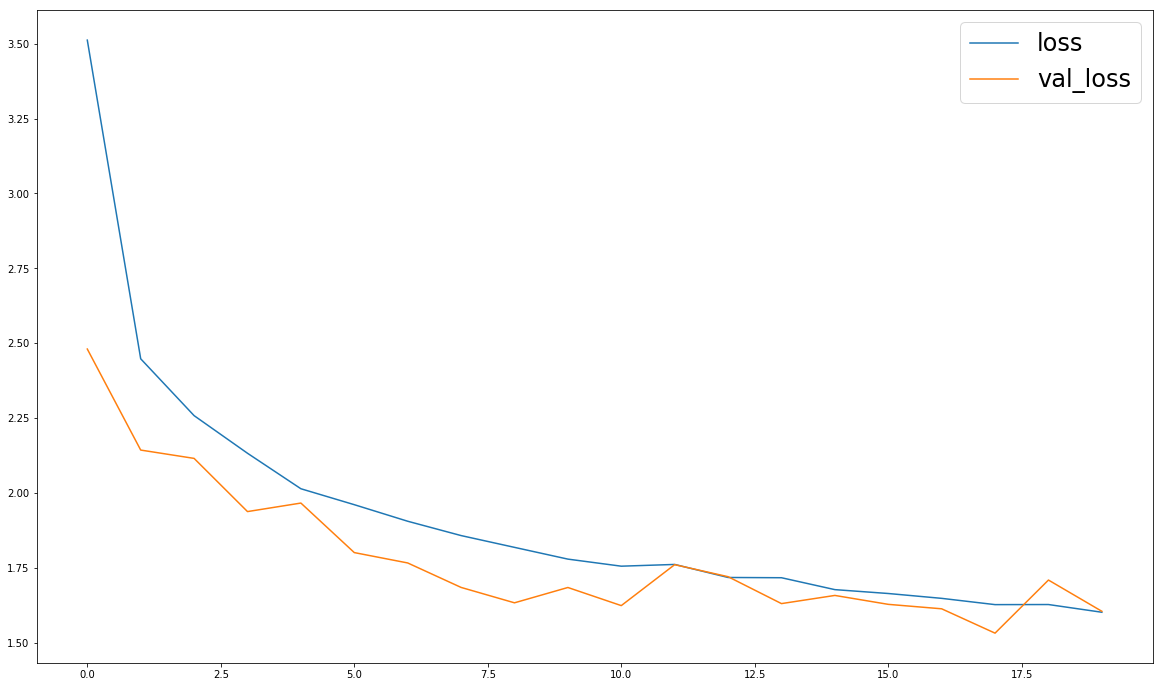

In [0]:
plt.figure(figsize=(20,12))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='upper right', prop={'size': 24});

In [0]:
predict_generator = val_dataset.generate(batch_size=1,
                                         shuffle=True,
                                         transformations=[],
                                         label_encoder=None,
                                         returns={'processed_images',
                                                  'processed_labels',
                                                  'filenames'},
                                         keep_images_without_gt=False)

batch_images, batch_labels, batch_filenames = next(predict_generator)

i = 0 # Which batch item to look at

print("Image:", batch_filenames[i])
print()
print("Ground truth boxes:\n")
print(batch_labels[i])

TypeError: ignored

In [0]:
y_pred = model.predict(batch_images)
y_pred_decoded = decode_detections(y_pred,
                                   confidence_thresh=0.5,
                                   iou_threshold=0.45,
                                   top_k=200,
                                   normalize_coords=normalize_coords,
                                   img_height=img_height,
                                   img_width=img_width)

np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('   class   conf xmin   ymin   xmax   ymax')
print(y_pred_decoded[i])

Predicted boxes:

   class   conf xmin   ymin   xmax   ymax
[]


NameError: ignored

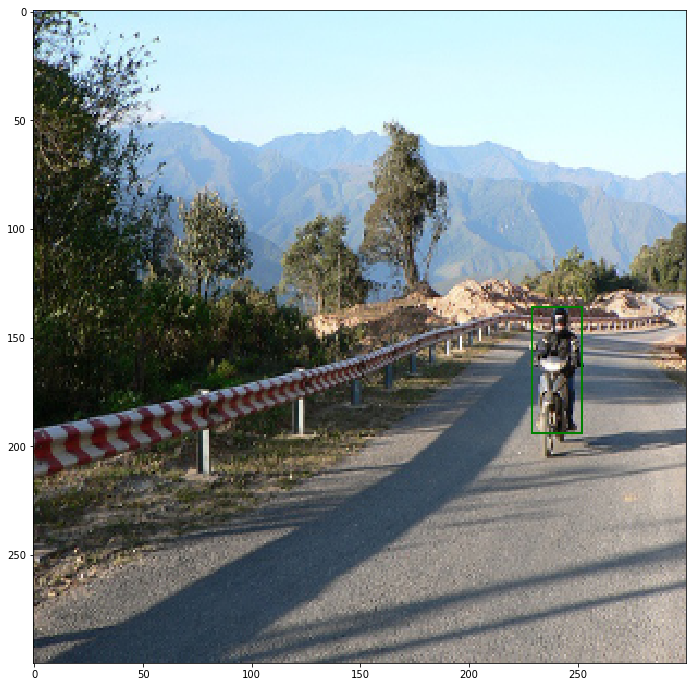

In [0]:
plt.figure(figsize=(20,12))
plt.imshow(batch_images[i])

current_axis = plt.gca()

colors = plt.cm.hsv(np.linspace(0, 1, n_classes+1)).tolist() # Set the colors for the bounding boxes
classes = ['background', 'shirt'] # Just so we can print class names onto the image instead of IDs

# Draw the ground truth boxes in green (omit the label for more clarity)
for box in batch_labels[i]:
    xmin = box[1]
    ymin = box[2]
    xmax = box[3]
    ymax = box[4]
    label = '{}'.format(classes[int(box[0])])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='green', fill=False, linewidth=2))  
    #current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':'green', 'alpha':1.0})

# Draw the predicted boxes in blue
for box in y_pred_decoded[i]:
    xmin = box[-4]
    ymin = box[-3]
    xmax = box[-2]
    ymax = box[-1]
    color = colors[int(box[0])]
    label = '{}: {:.2f}'.format(classes[int(box[0])], box[1])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})

(1, 300, 480, 3)


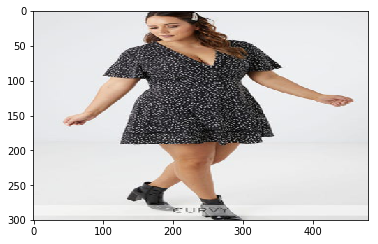

In [0]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://www.allyfashion.com/media/catalog/product/e/n/endrianna-skater-dress-cdd2349a-80-cdd2349a-80.jpg?width=350&height=520&quality=80&bg-color=255,255,255&fit=bounds')
img = Image.open(BytesIO(response.content))
img = np.array(img)
#img = cv2.resize(img, (300,300)) # cv2 resize ảnh theo x - cột, y - dòng !!!
#img = img.reshape(1,300,300,3)

img = cv2.resize(img, (480,300))
img = img.reshape(1,300,480,3)

print(img.shape)
plt.imshow(img[0])

In [0]:
y_pred = model.predict(img)
y_pred_decoded = decode_detections(y_pred,
                                   confidence_thresh=0.5,
                                   iou_threshold=0.45,
                                   top_k=200,
                                   normalize_coords=normalize_coords,
                                   img_height=img_height,
                                   img_width=img_width)

np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('   class   conf xmin   ymin   xmax   ymax')
print(y_pred_decoded[0])

Predicted boxes:

   class   conf xmin   ymin   xmax   ymax
[[  1.     1.    87.6   34.77 323.33 172.45]]


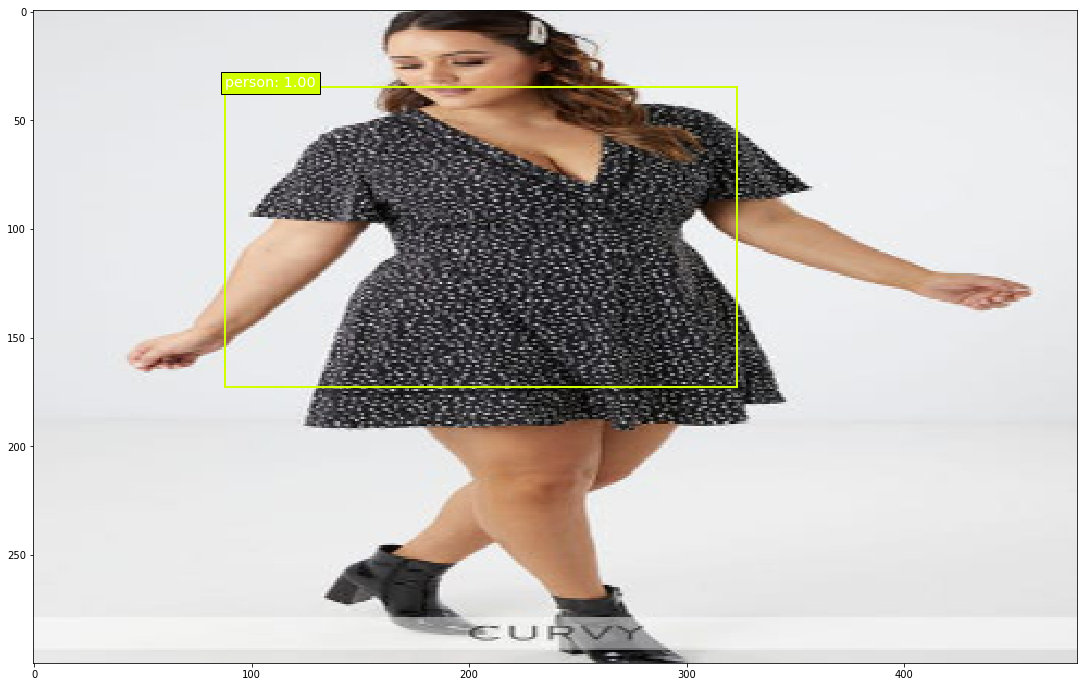

In [0]:
plt.figure(figsize=(20,12))
plt.imshow(img[0])

current_axis = plt.gca()

colors = plt.cm.hsv(np.linspace(0, 1, n_classes+1)).tolist() # Set the colors for the bounding boxes
classes = ['background', 'person'] # Just so we can print class names onto the image instead of IDs

# Ảnh lấy từ mạng ko có ground truth như validation data
# Draw the predicted boxes in blue
for box in y_pred_decoded[0]:
    xmin = box[-4]
    ymin = box[-3]
    xmax = box[-2]
    ymax = box[-1]
    color = colors[int(box[0])]
    label = '{}: {:.2f}'.format(classes[int(box[0])], box[1])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})

In [0]:
!mkdir '/content/Fashion Detection/Consumer to shop'

In [0]:
!cp -R '/content/drive/My Drive/DeepFashion/Consumer-to-shop Clothes Retrieval Benchmark/Img/img.zip' '/content/Fashion Detection/Consumer to shop/img.zip'

In [0]:
zip_ref = zipfile.ZipFile("/content/Fashion Detection/Consumer to shop/img.zip", "r")
zip_ref.extractall("/content/Fashion Detection/Consumer to shop")
zip_ref.close()

In [0]:
!ls '/content/Fashion Detection/Category and Atrribute/img'

 1981_Graphic_Ringer_Tee
 25_Mesh-Paneled_Jersey_Dress
 2-in-1_Space_Dye_Athletic_Tank
 36_Plaid_Shirt_Dress
 Above_Average_Linen_Tee
 Abstract_Animal_Print_Dress
 Abstract_Arrow_Flounce_Romper
 Abstract_Asymmetrical_Hem_Top
 Abstract_Bodycon_Dress
 Abstract_Brushstroke_Pocket_Top
 Abstract_Brushstroke_Print_Pencil_Skirt
 Abstract_Brushstroke_Sweater
 Abstract_Buttoned_Top
 Abstract_Chevron_Draped_Dress
 Abstract_Chevron_Henley_Dress
 Abstract_Chevron_Print_Culottes
 Abstract_Chevron_Print_Kimono
 Abstract_Chevron_Print_Shorts
 Abstract_Chevron_Print_Top
 Abstract_Chevron_Surplice_Dress
 Abstract_Cutout-Back_Top
 Abstract_Daisy_Print_Blouse
 Abstract_Diamond_Fringe_Kimono
 Abstract_Diamond_Print_Combo_Dress
 Abstract_Diamond_Print_Dress
 Abstract_Diamond_Print_Jumpsuit
 Abstract_Diamond_Print_Shorts
 Abstract_Dot_Off-the-Shoulder_Top
 Abstract_Dot_Surplice_Top
 Abstract_Dotted_Blouse
 Abstract_Dotted_Dress
 Abstract_Dotted_Panel_Tee
 Abstract_Drop_Waist_Dress
 Abstract-Embroidered_Glit

In [0]:
!ls '/content/Fashion Detection/Category and Atrribute/img/Abstract_Southwestern_Print_Flounce_Dress'

img_00000001.jpg  img_00000007.jpg  img_00000013.jpg  img_00000019.jpg
img_00000002.jpg  img_00000008.jpg  img_00000014.jpg  img_00000020.jpg
img_00000003.jpg  img_00000009.jpg  img_00000015.jpg  img_00000021.jpg
img_00000004.jpg  img_00000010.jpg  img_00000016.jpg  img_00000022.jpg
img_00000005.jpg  img_00000011.jpg  img_00000017.jpg  img_00000023.jpg
img_00000006.jpg  img_00000012.jpg  img_00000018.jpg  img_00000024.jpg


Text(0.5, 1.0, 'Category and Atrribute ...')

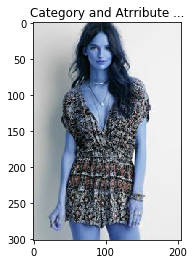

In [0]:
img = cv2.imread('/content/Fashion Detection/Category and Atrribute/img/Abstract_Southwestern_Print_Flounce_Dress/img_00000002.jpg')
plt.imshow(img)
plt.title('Category and Atrribute ...')